In [1]:
from statsbombpy import sb
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings; warnings.simplefilter('ignore')
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [2]:
euro_matches = sb.matches(competition_id=55, season_id=282)
matches = euro_matches["match_id"]

In [3]:
df_list = []
for i in matches:
    df = sb.events(i)
    df_list.append(df)

events = pd.concat(df_list, ignore_index=True)

In [4]:
events

,50_50,bad_behaviour_card,ball_receipt_outcome,block_deflection,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,goalkeeper_success_in_play,ball_recovery_offensive,dribble_no_touch,pass_miscommunication,player_off_permanent,goalkeeper_penalty_saved_to_post,goalkeeper_shot_saved_off_target,shot_follows_dribble,shot_saved_off_target,shot_redirect
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
passes = events[events["type"] == "Pass"]
passes = passes[["under_pressure","location", "position", "pass_length", "pass_angle", "pass_end_location", "pass_outcome"]]

In [6]:
passes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53890 entries, 6 to 185489
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   under_pressure     7335 non-null   object 
 1   location           53890 non-null  object 
 2   position           53890 non-null  object 
 3   pass_length        53890 non-null  float64
 4   pass_angle         53890 non-null  float64
 5   pass_end_location  53890 non-null  object 
 6   pass_outcome       8512 non-null   object 
dtypes: float64(2), object(5)
memory usage: 3.3+ MB


In [7]:
pressure_mapping = {"True": 1}
outcome_mapping = {"Incomplete": 0, "Injury Clearance": 0, "Out": 0, "Pass Offside": 0, "Unknown": 0}


passes["pass_outcome"]  = passes["pass_outcome"].map(outcome_mapping)
passes["under_pressure"]  = passes["under_pressure"].map(pressure_mapping)

In [8]:
passes["under_pressure"].fillna(0, inplace=True)
passes["pass_outcome"].fillna(1, inplace=True)

passes = passes.reset_index(drop=True)

In [9]:
passes

,under_pressure,location,position,pass_length,pass_angle,pass_end_location,pass_outcome
0,0.0,"[60.0, 40.0]",Right Defensive Midfield,34.738163,-2.982596,"[25.7, 34.5]",1.0
1,0.0,"[30.4, 24.1]",Goalkeeper,65.695740,0.462286,"[89.2, 53.4]",0.0
2,0.0,"[30.9, 26.7]",Left Center Back,30.236732,0.340577,"[59.4, 36.8]",0.0
3,0.0,"[60.7, 43.3]",Center Back,25.678005,0.316825,"[85.1, 51.3]",1.0
4,0.0,"[50.1, 16.3]",Left Back,15.160475,2.601173,"[37.1, 24.1]",1.0
...,...,...,...,...,...,...,...
53885,0.0,"[99.2, 22.2]",Right Wing,27.655200,-0.808412,"[118.3, 2.2]",1.0
53886,0.0,"[117.1, 2.0]",Left Back,17.042593,3.012143,"[100.2, 4.2]",1.0
53887,0.0,"[102.7, 4.5]",Left Defensive Midfield,15.110923,1.804540,"[99.2, 19.2]",1.0
53888,0.0,"[98.7, 19.1]",Right Wing,12.553884,0.392340,"[110.3, 23.9]",1.0


In [10]:
def classify_location(location):
    x = location[0] 
    if x <= 60:
        return 1
    elif x <= 120:
        return 2
    else:
        return None 

In [11]:
passes["pass_end_location"] = passes["pass_end_location"].apply(classify_location)
passes["location"] = passes["location"].apply(classify_location)

In [12]:
X = passes[["under_pressure","location", "pass_length", "pass_angle", "pass_end_location"]]
y = passes["pass_outcome"]

In [13]:
y

0        1.0
1        0.0
2        0.0
3        1.0
4        1.0
        ... 
53885    1.0
53886    1.0
53887    1.0
53888    1.0
53889    1.0
Name: pass_outcome, Length: 53890, dtype: float64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
clf = tree.DecisionTreeClassifier(criterion="gini",
                                      random_state=100, max_depth=3, min_samples_leaf=5)
clf = clf.fit(X_train, y_train)

In [16]:
y_pred = clf.predict(X_test)

[Text(0.5, 0.875, 'x[2] <= 35.885\ngini = 0.265\nsamples = 43112\nvalue = [6784, 36328]'),
 Text(0.25, 0.625, 'x[2] <= 4.102\ngini = 0.212\nsamples = 38482\nvalue = [4639, 33843]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[2] <= 2.948\ngini = 0.417\nsamples = 1054\nvalue = [742, 312]'),
 Text(0.0625, 0.125, 'gini = 0.261\nsamples = 563\nvalue = [476, 87]'),
 Text(0.1875, 0.125, 'gini = 0.497\nsamples = 491\nvalue = [266, 225]'),
 Text(0.375, 0.375, 'x[4] <= 1.5\ngini = 0.187\nsamples = 37428\nvalue = [3897, 33531]'),
 Text(0.3125, 0.125, 'gini = 0.107\nsamples = 17653\nvalue = [1004, 16649]'),
 Text(0.4375, 0.125, 'gini = 0.25\nsamples = 19775\nvalue = [2893, 16882]'),
 Text(0.75, 0.625, 'x[4] <= 1.5\ngini = 0.497\nsamples = 4630\nvalue = [2145, 2485]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[3] <= -1.111\ngini = 0.361\nsamples = 1372\nvalue = [324, 1048]'),
 Text(0.5625, 0.125, 'gini = 0.055\nsamples = 387\nvalue = [11, 376]'),
 Text(0.6875, 0.125, 'gini = 0

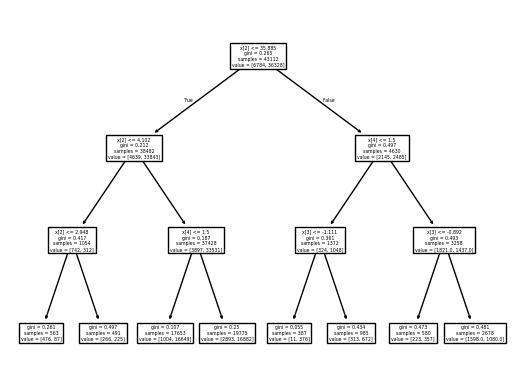

In [17]:
tree.plot_tree(clf)

In [18]:
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))


Confusion Matrix:  [[ 559 1169]
 [ 343 8707]]


In [19]:
print("Accuracy : ",accuracy_score(y_test, y_pred)*100)

Accuracy :  85.9714232696233


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.62      0.32      0.43      1728
         1.0       0.88      0.96      0.92      9050

    accuracy                           0.86     10778
   macro avg       0.75      0.64      0.67     10778
weighted avg       0.84      0.86      0.84     10778

